In [1]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from cStringIO import StringIO
import string
import numpy as np

In [2]:
from io import StringIO

In [3]:
max_pages = 20
pdf_file = 'economics_textbook.pdf'
stop_words = stopwords.words('english')
punctuation = set(string.punctuation)

In [4]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2)/float(euclidean_norm(v1)*euclidean_norm(v2))

In [5]:
def euclidean_norm(vector):
    return np.sqrt(np.sum([_vector**2 for _vector in vector]))

In [6]:
def remove_non_ascii(text):
    return ''.join([word for word in text if ord(word) < 128])

In [7]:
def load_data(raw_text=False, pdf_file=pdf_file, max_pages=max_pages, directory='data/'):
    return_string = StringIO()
    device = TextConverter(PDFResourceManager(), return_string, codec='utf-8', laparams=LAParams())
    interpreter = PDFPageInterpreter(PDFResourceManager(), device=device)
    filepath = open(directory+pdf_file, 'rb')
    for page in PDFPage.get_pages(filepath, set(), maxpages=max_pages, caching=True, check_extractable=True):
        interpreter.process_page(page)
    text_data = return_string.getvalue()
    filepath.close(), device.close(), return_string.close()
    if raw_text == True: return remove_non_ascii(text_data)
    else: text_data = ' '.join([word for word in word_tokenize(remove_non_ascii(text_data)) if word not in stop_words])
    return text_data

In [8]:
def gensim_preprocess_data(max_pages):
    data = load_data(max_pages=max_pages)
    sentences = sent_tokenize(data)
    tokenized_sentences = list([word_tokenize(sentence) for sentence in sentences])
    for i in range(0, len(tokenized_sentences)):
        tokenized_sentences[i] = [word for word in tokenized_sentences[i] if word not in punctuation]
    return tokenized_sentences

In [9]:
def gensim_skip_gram(max_pages=max_pages):
    sentences = gensim_preprocess_data(max_pages=max_pages)
#     print (sentences)
    skip_gram = Word2Vec(sentences=sentences, window=1, min_count=10, sg=1)
    word_embedding = skip_gram[skip_gram.wv.vocab]
    pca = PCA(n_components=2)
    _word_embedding = pca.fit_transform(word_embedding)
    
    #Plotting results from trained word embedding
    plt.scatter(word_embedding[:, 0], word_embedding[:, 1])
    word_list = list(skip_gram.wv.vocab)
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(_word_embedding[i, 0], _word_embedding[i, 1])) 
        
    #Printing Cosine Similaritys of a few words
    for i in range(1, len(word_list)- 1):
        print(str('Cosine distance for %s  and %s' + 
              '\n ' + 
              str(cosine_similarity(word_embedding[i, :], word_embedding[i-1, :])))%(word_list[i], word_list[i-1]))


In [10]:
def gensim_cbow(max_pages):
    sentences = gensim_preprocess_data(max_pages=max_pages)
    
    cbow = Word2Vec(sentences=sentences, 
                    window=1, 
                    min_count=10, 
                    sg=0,
                    cbow_mean=0)
    
    word_embedding = cbow[cbow.wv.vocab]
    pca = PCA(n_components=2)
    word_embedding = pca.fit_transform(word_embedding)
    
    #Plotting results from trained word embedding
    plt.scatter(word_embedding[120:150, 0], word_embedding[120:150, 1])
    word_list = list(cbow.wv.vocab)
    for i in range(120, 150):
        plt.annotate(word_list[i], xy=(word_embedding[i, 0], word_embedding[i, 1]))

/home/SENSETIME/xiedongming/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


Cosine distance for The  and This
 0.3306509151807545
Cosine distance for Saylor  and The
 0.5980482053171255
Cosine distance for URL  and Saylor
 0.43642632175234
Cosine distance for http  and URL
 0.6014593979827118
Cosine distance for //www.saylor.org/books  and http
 0.5811116576175506
Cosine distance for Saylor.org  and //www.saylor.org/books
 0.6327290333408205
Cosine distance for 1  and Saylor.org
 0.42408144087380834
Cosine distance for We  and 1
 0.17672950826384828
Cosine distance for different  and We
 0.302023102102212
Cosine distance for economics  and different
 0.5289956628018119
Cosine distance for two  and economics
 0.5028094216677896
Cosine distance for study  and two
 0.34945951037368544
Cosine distance for see  and study
 0.4496440377220149
Cosine distance for 2  and see
 0.2723585631932801
Cosine distance for learn  and 2
 0.2308396532768566
Cosine distance for first  and learn
 0.28147824128814014
Cosine distance for question  and first
 0.21221742801236296
Cosin

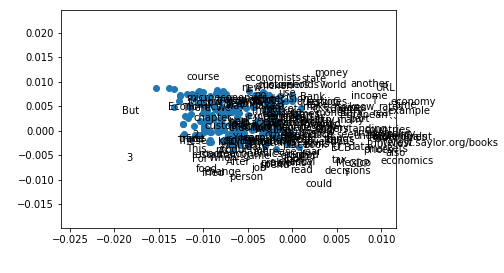

In [11]:
gensim_skip_gram(max_pages=50)